In [129]:
# Import
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# Parameters
n = 30
num = 99991
max_threads = 30

csv_name = "output_BIGNUMBER"

In [131]:
CSV = pd.read_csv(f"{csv_name}.csv")

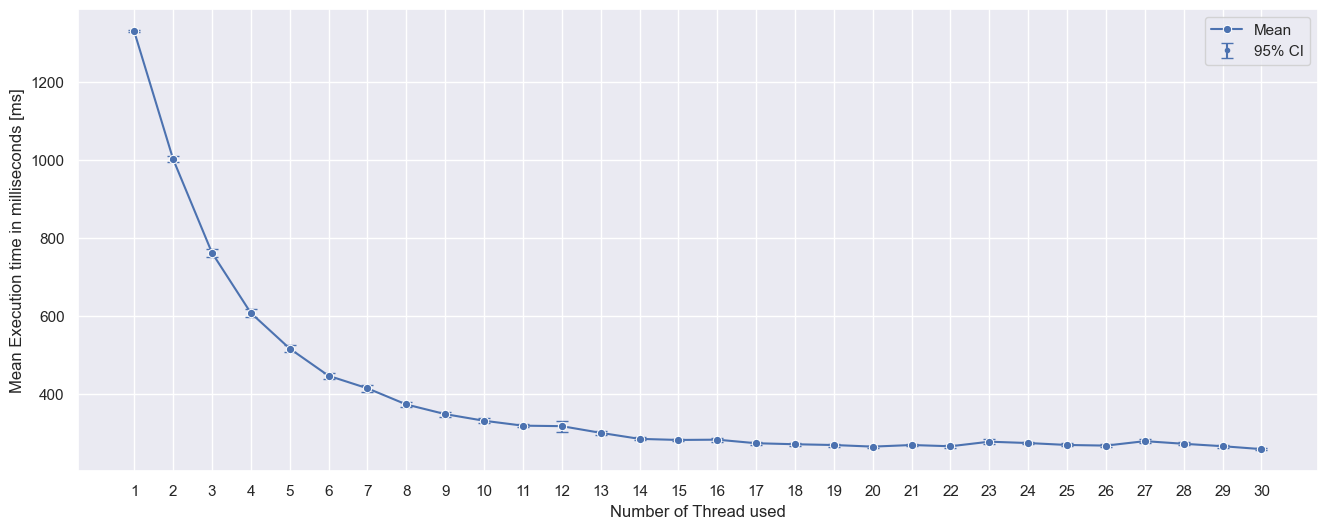

In [141]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 6))

y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    y_V.append(CSV[CSV["num_threads"] == thread]["execution_time"].mean())
    ci.append(1.96 * (CSV[CSV["num_threads"] == thread]["execution_time"].std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=3, capsize=4, color='b', label="95% CI")

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean")
    
plt.xlabel('Number of Thread used')
plt.ylabel('Mean Execution time in milliseconds [ms]')

plt.xticks(thread_ticks)

plt.legend()
plt.show()

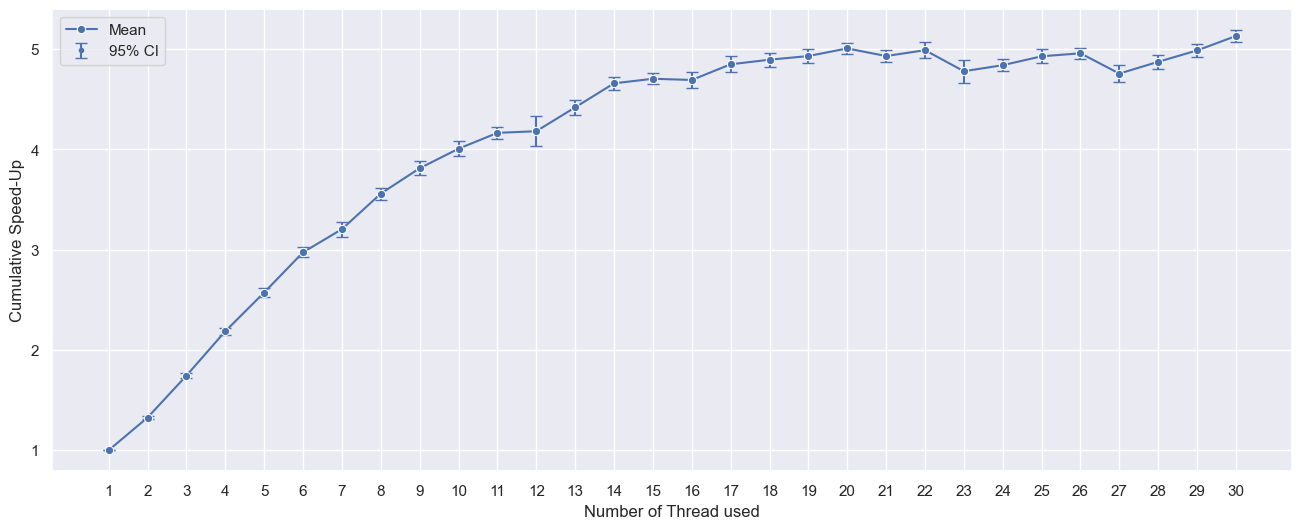

In [149]:
# Cumulative Speedup
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 6))

y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    y_V.append(CSV[CSV["num_threads"] == 1]["execution_time"].mean() / CSV[CSV["num_threads"] == thread]["execution_time"].mean())
    ci.append(1.96 * ((CSV[CSV["num_threads"] == 1]["execution_time"] / CSV[CSV["num_threads"] == thread]["execution_time"].reset_index(drop=True)).std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=3, capsize=4, color='b', label="95% CI")

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean")
    
plt.xlabel('Number of Thread used')
plt.ylabel('Cumulative Speed-Up')

plt.xticks(thread_ticks)


plt.legend()
plt.show()

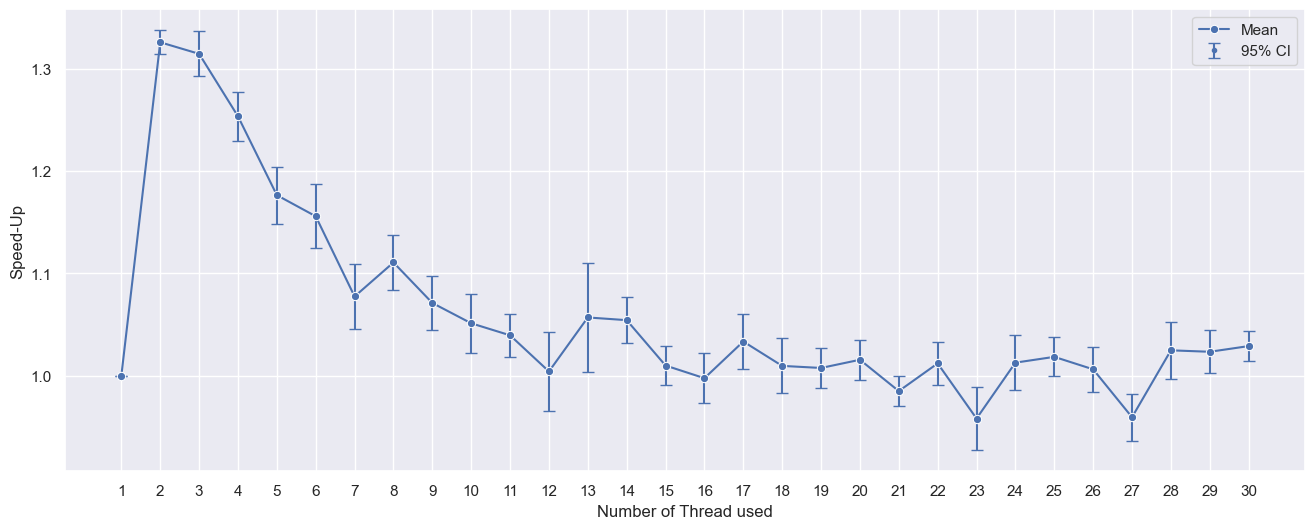

In [147]:
# Speedup
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 6))

y_V = []

ci = []

thread_ticks = sorted(CSV['num_threads'].unique())

for thread in range(1, max_threads+1):

    if thread == 1:
        y_V.append(1)
        ci.append(0)
    else:
        y_V.append(CSV[CSV["num_threads"] == (thread-1)]["execution_time"].mean() / CSV[CSV["num_threads"] == thread]["execution_time"].mean())
        ci.append(1.96 * ((CSV[CSV["num_threads"] == (thread-1)]["execution_time"].reset_index(drop=True) / CSV[CSV["num_threads"] == thread]["execution_time"].reset_index(drop=True)).std() / math.sqrt(n)))


plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=3, capsize=4, color='b', label="95% CI")

sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean")
    
plt.xlabel('Number of Thread used')
plt.ylabel('Speed-Up')

plt.xticks(thread_ticks)


plt.legend()
plt.show()